### 임베딩
##### 1. 희소 표현 기반 임베딩
##### 2. 횟수 기반 임베딩
##### 3. 예측 기반 임베딩
##### 4. 횟수/예측 기반 임베딩


In [14]:
# 1. 희소 표현 기반 임베딩
import numpy as np
import pandas as pd
class2 = pd.read_csv("080263/chap10/data/class2.csv")

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder(sparse_output=False)

var = np.array(class2['class2']).reshape(-1, 1)
train_x = onehot_encoder.fit_transform(var)
print(train_x)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [15]:
# 2. 횟수 기반 임베딩
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is last chance',
    'and if you do not have this chance',
    'you will never get any chance',
    'will you do get this one?',
    'please, get this chance'
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [16]:
vect.transform(['you will never get any chance']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [17]:
vect = CountVectorizer(stop_words=['and', 'is', 'please', 'this']).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print(doc_distance)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	0.224324998974933
  (0, 0)	1.0000000000000002
  (1, 1)	1.0000000000000002
  (1, 0)	0.224324998974933
  (2, 2)	1.0000000000000002


In [17]:
# 3. 예측 기반 임베딩
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

sample = open("080263/chap10/data/peter.txt", "r", encoding="UTF8")
s = sample.read()
f = s.replace("\n", " ")

data = []
for i in sent_tokenize(f):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

In [28]:
model1 = Word2Vec(data, min_count=1, vector_size=100, window=5, sg=0)
print("Cosine similarity between 'peter' 'wendy' - CBOW :", model1.wv.similarity('peter', 'wendy'))
print("Cosine similarity between 'peter' 'hook' - CBOW :", model1.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'wendy' - CBOW : 0.07439384
Cosine similarity between 'peter' 'hook' - CBOW : 0.027709857


In [29]:
model2 = Word2Vec(data, min_count=1, vector_size=100, window=5, sg=1)
print("Cosine similarity between 'peter' 'wendy' - Skip Gram :", model2.wv.similarity('peter', 'wendy'))
print("Cosine similarity between 'peter' 'hook' - Skip Gram :", model2.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'wendy' - Skip Gram : 0.40088683
Cosine similarity between 'peter' 'hook' - Skip Gram : 0.52016735


In [36]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText("080263/chap10/data/peter.txt", vector_size=4, window=3, min_count=1, epochs=10)
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.4592452
0.043825686


In [10]:
from __future__ import print_function
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format("080263/chap10/data/wiki.ko.vec")

In [11]:
for similar_word in model_kr.similar_by_word('노력'):
    print(similar_word[0], similar_word[1])

노력함 0.796721339225769
노력중 0.7502310872077942
노력만 0.7195297479629517
노력과 0.7137250900268555
노력의 0.6944872140884399
노력가 0.6931817531585693
노력이나 0.6855085492134094
노력없이 0.6761217713356018
노력맨 0.6756712198257446
노력보다는 0.6753138303756714


In [14]:
similarities = model_kr.most_similar(positive=['동물', '육식동물'], negative=['사람'])
print(similarities[0])

('초식동물', 0.7804122567176819)


In [3]:
# 4. 횟수/예측 기반 임베딩
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath("/Users/minwoo/dev/Awesome-DL-Study/Deep_Learning_With_Tensorflow/080263/chap10/data/glove.6B.100d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/var/folders/nw/qdcvjm9j4vld91v373k868280000gn/T/ipykernel_17578/2666281902.py:13: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072139620780945),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142540812492371),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845566630363464),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140058517456)]

In [5]:
model.most_similar(negative=['cherry'])

[('kazushige', 0.4834350347518921),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713332295417786),
 ('tadayoshi', 0.4522107243537903),
 ('turani', 0.44810065627098083),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423117935657501)]

In [6]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380331993103),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464518308639526),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [7]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[x1, x2], negative=[y1])
    return result[0][0]

print(analogy('beer', 'france', 'australia'))
print(analogy('tallest', 'long', 'tall'))

champagne
longest


In [9]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


### 트랜스포머 어텐션
##### 1. seq2seq
##### 2. Bert
##### 3. 엘모

In [17]:
# seq2seq

from __future__ import absolute_import, division, print_function, unicode_literals

import unicodedata
import tensorflow as tf
import numpy as np
import os
import io
import re
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

In [2]:
def unicode_to_ascii(s):
     return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r"([?.!,¿])", r" \1", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()
    w = '<start> ' + w + ' <end>'
    return w 

In [3]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿ Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [4]:
def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')] for l in lines[:num_examples]]
    return zip(*word_pairs)

def max_length(tensor):
    return max(len(t) for t in tensor)

def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)

    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    return tensor, lang_tokenizer

def load_dataset(path, num_examples=None):
    targ_lang, inp_lang = create_dataset(path, num_examples)

    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer


In [5]:
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset("080263/chap10/data/spa.txt", num_examples)
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

In [6]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train) // BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index) + 1
vocab_targ_size = len(targ_lang.word_index) + 1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [7]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(
            self.enc_units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer='glorot_uniform'
        )

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state=hidden)
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))
    
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

In [8]:
class EDAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(EDAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [9]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(
            self.dec_units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer='glorot_uniform'
        )
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = EDAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, attention_weights
    
decoder = Decoder(vocab_targ_size, embedding_dim, units, BATCH_SIZE)

In [10]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ += mask
    return tf.reduce_mean(loss_)

In [11]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(
    optimizer=optimizer,
    encoder=encoder,
    decoder=decoder
)

In [12]:
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)
    batch_loss = (loss / int(targ.shape[1]))
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return batch_loss

In [13]:
EPOCHS = 3

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch+1, batch, batch_loss.numpy()))
        
    if (epoch+1) % 2 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)
        print('Epoch {} Loss {:.4f}'.format(epoch+1, total_loss/steps_per_epoch))

    print('Time taken for 1 epoch {} sec\n'.format(time.time()-start))


Epoch 1 Batch 0 Loss 8.2511
Epoch 1 Batch 100 Loss 2.9450
Epoch 1 Batch 200 Loss 2.5677
Epoch 1 Batch 300 Loss 2.4809


2024-07-04 23:01:17.494046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Time taken for 1 epoch 800.5532758235931 sec

Epoch 2 Batch 0 Loss 2.3526
Epoch 2 Batch 100 Loss 2.2405
Epoch 2 Batch 200 Loss 2.2002
Epoch 2 Batch 300 Loss 2.1097


2024-07-04 23:15:31.440501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2 Loss 2.1641
Time taken for 1 epoch 854.1089751720428 sec

Epoch 3 Batch 0 Loss 1.9129
Epoch 3 Batch 100 Loss 1.8411
Epoch 3 Batch 200 Loss 1.8394
Epoch 3 Batch 300 Loss 1.8265
Time taken for 1 epoch 811.3404030799866 sec



2024-07-04 23:29:02.944726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')

    inputs = tf.convert_to_tensor(inputs)
    result = ' '
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        attention_weights = tf.reshape(attention_weights, (-1,))
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += targ_lang.index_word[predicted_id] + ' '
        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0)
    
    return result, sentence, attention_plot


In [25]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict, rotation=90)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

Input: <start> esta es mi vida . <end>
Predicted translation:  this is my father . <end> 


/var/folders/nw/qdcvjm9j4vld91v373k868280000gn/T/ipykernel_1082/1296823959.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/var/folders/nw/qdcvjm9j4vld91v373k868280000gn/T/ipykernel_1082/1296823959.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict, rotation=90)


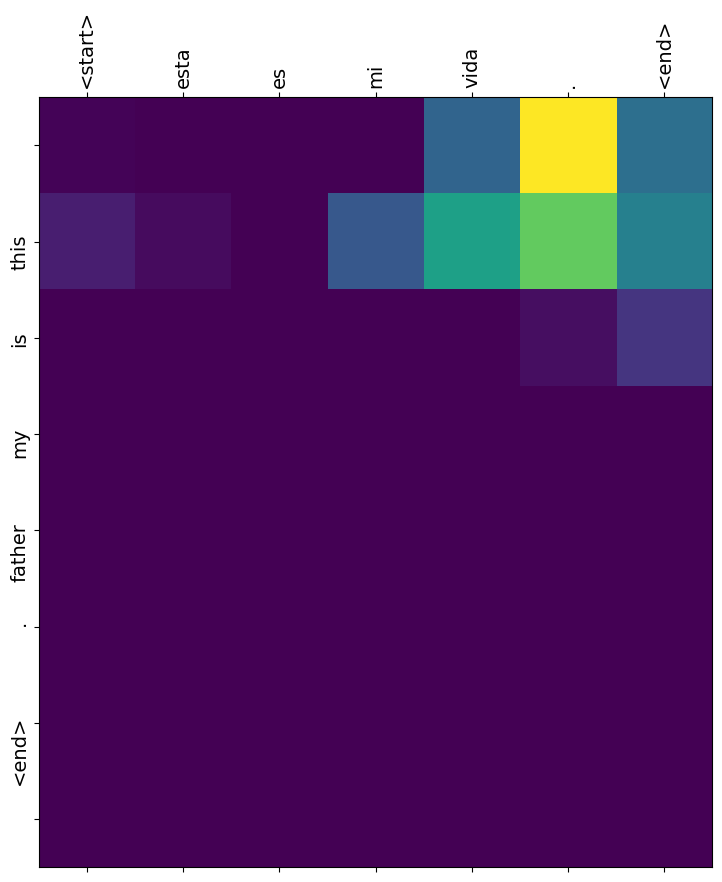

In [26]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

translate(u'esta es mi vida.')